# .h5 dataset examination

## Why?

To figure out what's inside and in which format.

In [1]:
# Show what's in the directory we are in
!ls 

dataset_examination.ipynb  segs.h5  SynthText.h5


In [5]:
import h5py
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Open dataset and see, what's inside

In [3]:
db_path = 'SynthText.h5'
db = h5py.File(db_path,'r')

In [4]:
print(list(db['data'].items()))

[('hiking_125.jpg_0', <HDF5 dataset "hiking_125.jpg_0": shape (500, 600, 3), type "|u1">), ('indian+musicians_116.jpg_0', <HDF5 dataset "indian+musicians_116.jpg_0": shape (600, 400, 3), type "|u1">), ('sandwich_96.jpg_0', <HDF5 dataset "sandwich_96.jpg_0": shape (446, 600, 3), type "|u1">), ('sea_15.jpg_0', <HDF5 dataset "sea_15.jpg_0": shape (375, 600, 3), type "|u1">), ('village_43.jpg_0', <HDF5 dataset "village_43.jpg_0": shape (476, 600, 3), type "|u1">)]


## Add segmentation images to your own dataset

In [15]:
import numpy as np
def add_segs_to_db(db_path='segs.h5', segs=None, imgname='image'):
    """
    Add segmentated images and their names
    to the dataset.
    """
    db = h5py.File(db_path,'w')
    db.create_group("ucms")
    names = list()
    ninstance = len(segs)

    for i in range(ninstance):
        dname = "%s_%d"%(imgname, i)

        db['ucms'].create_dataset(dname, data=segs[i])
        names.append(dname)

    # add names

    names_ascii = [n.encode("ascii", "ignore") for n in names]
    db.create_dataset('names', (len(names_ascii),1),'S10', names_ascii)
    db.close()

In [6]:
# Function for tests (this is used in original code)
def get_imname(ucm_h5, i):
            return "".join(map(chr, ucm_h5['names'][0,i][:]))

In [7]:
# Load segmentation image we want to store to the .h5 dataset
seg_image = cv2.imread('/home/gayduchenko/data/curved_paper_segmentation.jpg')

In [8]:
# Add the image to the dataset
segs = list()
segs.append(seg_image)
add_segs_to_db(segs=segs)

In [9]:
# See what we have got
!ls

dataset_examination.ipynb  segs.h5  SynthText.h5


Датасет создан! Теперь проверим, всё ли нормально создалось.

In [50]:
# Load dataset made by PyTorch-HED with segmentation images
dset = h5py.File('../../pytorch-hed/out.png.h5', 'r')
print(list(dset['names'][0, 0]))

[105, 109, 97, 103, 101, 95, 48]


In [23]:
# Test function on the first image of the dataset
get_imname(dset, 0)

'image_0'

Works pretty fine

In [19]:
# Print dataset as a tree
def print_attrs(name, obj):
    print(name)
    for key, val in obj.attrs.items():
        print ("    %s: %s" % (key, val))

In [11]:
dset.visititems(print_attrs)

NameError: name 'dset' is not defined

## Check the segmentation image

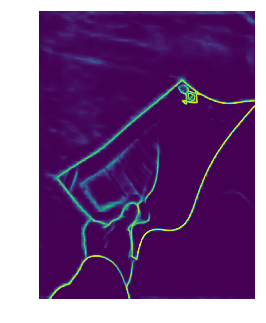

In [56]:
# Check the segmentation image
pixels = dset['ucms'][dset['names'][0, 0]][:] 
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
im = ax.imshow(pixels)

# SAVE and show the image
fig.savefig('out_segmented.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [54]:
!ls

dataset_examination.ipynb  out_segmented.png  segs.h5  SynthText.h5


## Check labeled dataset curved_paper_labeled.h5

We have passed the dataset `curved_paper_segmented.jpg.h5` prepared before as an output of `pytorch-hed/run.py` file. Now we want to get labels and areas (and segments) using `SynthText3/prep_scripts/floodFill.py` script. The script takes the dataset described above as input and returns labeled dataset `curved_paper_labeled.h5` as output. Let's see, what we have got at the end:

In [16]:
!ls ~/data

curved_paper.jpg	    curved_paper_labels.h5
curved_paper.jpg_depth.npy  curved_paper_segmented.jpg
curved_paper.jpg_depth.png  curved_paper_segmented.jpg.h5


In [28]:
labels_file = h5py.File('/home/gayduchenko/data/curved_paper_labels.h5', 'r')
labels_file.visititems(print_attrs)

mask
mask/image_0
    area: [    37    132     11    390     78   1881     19    285    159      6
     56   1970  32932      2      4      1    298      2    246     75
      2    198    534     87   1132    773     16  23331     16   2300
     10      1    142     56     92    338      2    391 103544     63
  15329      1   4471  13328      4   1021   2035      1     85      2
    974    135      6    525    281   3296    244 153663    897    179
      1    210      4   1522     43      1   1903     83    813    309
     36      4  25951    389      1    124   4987     28     99]
    label: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79]


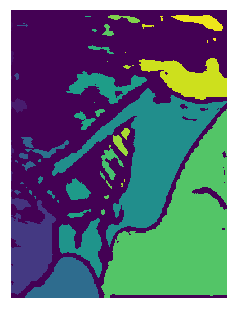

In [40]:
# Check the segmentation image
pixels = labels_file['mask/image_0'][:]
fig, ax = plt.subplots()
ax.set_axis_off()
fig.subplots_adjust(bottom = 0)
fig.subplots_adjust(top = 1)
fig.subplots_adjust(right = 1)
fig.subplots_adjust(left = 0)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
im = ax.imshow(pixels)

# SAVE and show the image
import os.path as osp
home = osp.expanduser("~")
fig.savefig(osp.join(home, 'data/curved_paper_labels.jpg'), bbox_inches='tight', pad_inches=0)
plt.show()

In [32]:
!ls

curved_paper_labels.jpg    out_segmented.png  SynthText.h5
dataset_examination.ipynb  segs.h5
